# Numpy and Pandas

## Numpy

A collection of many functions is called a module.
Luckily many useful modules already exist which perfom many of the tasks that we need to do.
One of the most useful modules is called *numpy* (**num**erical **Py**thon) – it contains many functions to deal with numerical programming.

To use the functions contained within `numpy` we first need to *import* it.

In [1]:
import numpy as np

The `as` statement gives us a shorthand to use in the code when we want to access numpy, in this case `np`.

To use the functions within numpy, e.g. the square root function, we can type:

In [2]:
np.sqrt(9.)

3.0

where we need the `np.` at the start of the function to tell python that it's contained within the numpy module.

The `numpy` is also useful as we can create something called an *array* and assign it to a variable. This is a collection of numbers similar to a vector.
For example we could create an array using:

In [3]:
arr = np.array([1.,1.,2.,3.,5.,8.])

We can then do the same to all elements of the array at once similar to with single numbers, e.g. to multiply all numbers in the array by two:

### Numpy types and datetime objects
One important feature of a `numpy` array is that (unlike a list) all values contained within it must be of the same *type*. That means a numpy array can only contain e.g. floats, integers OR strings etc. and not a combination. To do this you can use the `dtype` attribute:

In [4]:
arr.dtype

dtype('float64')

The benefit of this is that `numpy` can apply the same functionality to every value because it knows what type of object it is. For instance every element of an array can be multipled by 2 at once using this simple functionality:

In [5]:
print(arr * 2)

[ 2.  2.  4.  6. 10. 16.]


When creating an array `numpy` is clever enough to be able to work out what the `dtype` is. In the example above decimal numbers were included so `numpy` decided that this array should contain float objects (the name for decimal values in python). However, it is also possible to tell `numpy` what type you want in an array by passing an argument for the `dtype`:

In [6]:
arr2 = np.array([1,2,3,4,5],dtype="float")
print(arr2.dtype)

float64


In this case even though the numbers passed were integers, we could tell `numpy` to create float objects instead. This is important when introducing another object which you will see called a `datetime64` object. This is a special object for understanding date and time strings

In [7]:
arr_dt = np.array(["2012-01-01","2013-01-01","2014-02-01"],dtype="datetime64")
print(arr_dt.dtype)

datetime64[D]


As before we can then perform an operation, such as adding 2 days, and `numpy` understands how to interpret this:

In [8]:
arr_dt + 2

array(['2012-01-03', '2013-01-03', '2014-02-03'], dtype='datetime64[D]')

The concept of datetime objects will come up again when we discuss `pandas` below and is used a lot when looking at timeseries data.

### Indexing
Indexing in `numpy` works in similar way to python list objects and still starts from 0 rather than 1.
For example, we can type:

In [9]:
print(arr[2] * 2)

4.0


To access the first 3 elements of the array we can type:

In [10]:
print(arr[0:3])

[1. 1. 2.]


That is all elements up to, but not including, the one with index 3. You'll get used to this sort of indexing system quite quickly.

Just like for scalar variables, we can also perform a function on an array, for example to find the `mean` and `std` of an array we can type

In [11]:
mean=np.mean(arr)
std=np.std(arr)
print("Mean of array = ",mean)
print("Standard deviation of array = ",std)

Mean of array =  3.3333333333333335
Standard deviation of array =  2.494438257849294


We can also replace one number or multiple numbers in the array by:

In [12]:
arr[0] = 0.
print(arr[0])

0.0


## Exercise

1. Create a numpy array containing the following values:

`[1.2, 3.8, 7.9, 4.5, 6.1]`
2. Calculate the halved values of this array.
3. Sort the array from lowest to highest values (see for details of relevant numpy functions - https://docs.scipy.org/doc/numpy/reference/routines.sort.html)
4. Re-create this array but this time to include integer values rather than floats.

**BONUS**
5. Create an array containing datetimes for 5th March for the 2016-2019 period.

Overall, the `numpy` module is very powerful and has lots of functions available as well as useful tricks with arrays. Check out the numpy documentation https://docs.scipy.org/doc/numpy/reference/ for more information and we would encourage you all to use  this and the internet as much as possible.

# Pandas

Another external module which we use is *pandas*. This is a more extensive data analysis package which is very useful for analysis data and for reading data files. This section will guide you through the steps to read in timeseries data in csv format using `pandas`, cut it down to the time period that you're interested in and to average the data into new chunks.

Like all modules we have to begin by importing it, using the shorthand `pd` to access the module,

In [13]:
import pandas as pd

Now we've imported the Pandas we can use one of its functions to read in a csv file.
The csv file we will read in contains two-hourly methane measurements at the Mace Head measurement station in Ireland, which is run by ACRG, in 2014. The keyword `index_col="time"` tells the function that the measurements are indexed by the column with the heading `"time"` and `"parse_dates=True"` tells it that that column contains times.

In [14]:
ch4data = pd.read_csv("data/ch4_macehead_2014.csv", index_col="time", parse_dates=True)

We can take a look at some of the data by printing it to the screen,  

In [15]:
ch4data

,mf
time,
2014-01-01 00:00:00,0.000002
2014-01-01 02:00:00,0.000002
2014-01-01 04:00:00,0.000002
2014-01-01 06:00:00,0.000002
2014-01-01 08:00:00,0.000002
2014-01-01 10:00:00,0.000002
2014-01-01 12:00:00,0.000002
2014-01-01 14:00:00,0.000002
2014-01-01 16:00:00,0.000002


where the variable `"ch4data"` is known as a DataFrame and contains both information about both the measurment times and the measured mole fraction in air (`mf`).
We can only see a small selection of the data when we print it to the screen so instead we will plot the data on a graph to look at the whole time series.
You can do this simply by first importing a plotting module followed by a simple plot function (there will be much more on customising your plots later!),

In [16]:
import matplotlib.pyplot as plt
plt.plot(ch4data)

Now we can visualise the entire year of methane emissions.
What if we only want to work with a subset of the data, say one month?
To do this we can cut the data down using some of Panda's inbuilt functionality.
For example, to select the month of May we can type,

In [17]:
maych4data = ch4data.loc["2014-05-01":"2014-06-01"]

which slices the timeseries to the period defined within the slice.
Again, we can print this data to the screen,

In [18]:
maych4data

,mf
time,
2014-05-01 00:00:00,0.000002
2014-05-01 02:00:00,0.000002
2014-05-01 04:00:00,0.000002
2014-05-01 06:00:00,0.000002
2014-05-01 08:00:00,0.000002
2014-05-01 10:00:00,0.000002
2014-05-01 12:00:00,0.000002
2014-05-01 14:00:00,0.000002
2014-05-01 16:00:00,0.000002


or plot it using,

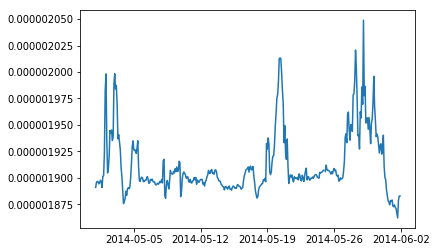

In [19]:
plt.plot(maych4data)

If we're not interested in two-hourly data and instead just want to look at something like the monthly means, we can resample the data to this period.
This is done using the command

In [20]:
ch4monthlymean = ch4data.resample("MS").mean()

By passing "MS" to the resample function, we are telling pandas that we want to sample each month of the data and set the index to the start of the month (MS is short for month-start).
This time we can print the whole resampled timeseries to the screen.

In [21]:
ch4monthlymean

,mf
time,
2014-01-01,0.000002
2014-02-01,0.000002
2014-03-01,0.000002
2014-04-01,0.000002
2014-05-01,0.000002
2014-06-01,0.000002
2014-07-01,0.000002
2014-08-01,0.000002
2014-09-01,0.000002


Finally, we can take a look at this data on a plot.

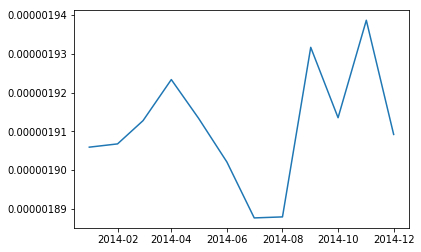

In [22]:
plt.plot(ch4monthlymean)

# Exercise

In Spyder, open a new Python script file and write the code to do the following in it:
 1. Read "ch4_capegrim_2012-2016.csv" from within the "data" directory as a numpy array. This contains **monthly** methane concentrations from Cape Grim in Australia from 2012 - 2016. *Hint: You may want to look the file first to see what options from the above example you need to update.*
 2. Find the mean and standard deviation of the measured concentration of methane for 2012 in $\text g/m^3$.

## Next Topic

When ready you can move onto the next topic:

### [Xarray and netCDF files](xarray.ipynb)

To view the introduction page containing the list of topics click [here](introduction.ipynb)